
# 미니 프로젝트: 데이터로 이야기하기 (EDA Template)

**목표**
- 당뇨병 데이터(`train.csv`)를 사용해 스스로 **가설을 세우고**, **탐색**, **시각화**, **인사이트**를 도출합니다.  
- 각 단계의 **TODO**를 채워주세요.

---

## ✅ 실습 진행표
1. 가설 세우기  
2. 데이터 불러오기  
3. 기본 EDA (info/describe/결측)  
4. 결측치 처리 (0 → NaN → 채우기)  
5. 단변량 시각화  
6. 이변량 시각화  
7. 상관관계 Heatmap  
8. 인사이트 정리


In [1]:

# 1️⃣ 가설 세우기
# ------------------------------------------------
# 아래에 자신만의 가설을 1~2개 작성해보세요.
# ------------------------------------------------

# TODO: 여기에 가설을 적으세요
hypothesis_1 = "BMI가 높은 사람은 피부 두께도 두꺼울것이다."
hypothesis_2 = "당뇨 가족력이 있는 사람이 없는 사람보다 당뇨 발병률이 높을것이다."


In [2]:

# 2️⃣ 데이터 불러오기
# ------------------------------------------------
# 'diabetes.csv' 파일을 불러오세요.
# - 같은 폴더에 두거나, 절대/상대 경로를 명시하세요.
# ------------------------------------------------

import pandas as pd

# TODO: 파일 경로를 채우세요
df = pd.read_csv('train.csv')


In [4]:

# 3️⃣ 기본 EDA
# ------------------------------------------------
# - 데이터의 구조와 기본 통계를 확인합니다.
# - 결측치(NA) 여부와 비율을 확인합니다.
# ------------------------------------------------

df.info()
df.describe()

# 결측치 개수/비율 보기
na_count = df.isna().sum().sort_values(ascending=False)
na_ratio = (df.isna().mean().sort_values(ascending=False) * 100).round(2)
display(na_count, na_ratio)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        652 non-null    object 
 1   Pregnancies               652 non-null    int64  
 2   Glucose                   652 non-null    int64  
 3   BloodPressure             652 non-null    int64  
 4   SkinThickness             652 non-null    int64  
 5   Insulin                   652 non-null    int64  
 6   BMI                       652 non-null    float64
 7   DiabetesPedigreeFunction  652 non-null    float64
 8   Age                       652 non-null    int64  
 9   Outcome                   652 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 51.1+ KB


ID                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

ID                          0.0
Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


### 🔧 결측치 처리 가이드

- 이 데이터에서는 `0`이 **실제로는 결측(미측정)** 을 의미할 수 있습니다.  
- 다음 컬럼에서 `0 → NaN`으로 바꾼 뒤, 적절한 방식으로 채우세요.

> 권장 컬럼: `["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]`  
> 채우기 아이디어: **중앙값**, 혹은 **그룹별(예: AgeBand, BMI Band)** 대표값


In [5]:

# 4️⃣ 결측치 처리 (0 → NaN → 채움)
# ------------------------------------------------
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for c in cols:
    df[c] = df[c].replace(0, None)

In [7]:
df.isnull().sum()

ID                            0
Pregnancies                   0
Glucose                       4
BloodPressure                30
SkinThickness               195
Insulin                     318
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
df['Age_Band'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 100], labels=['20대', '30대', '40대', '50대', '60대', '70대이상'])

In [11]:
for i in cols:
    cols_mean = df.groupby('Age_Band')[i].transform('mean')
    df[i] = df[i].fillna(cols_mean)

/var/folders/hq/nv6vbr1s14g02bjpd___x4_80000gn/T/ipykernel_51228/2179621737.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cols_mean = df.groupby('Age_Band')[i].transform('mean')
/var/folders/hq/nv6vbr1s14g02bjpd___x4_80000gn/T/ipykernel_51228/2179621737.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i] = df[i].fillna(cols_mean)


In [12]:
df['BMI_Band'] = pd.cut(df['BMI'], bins=[0, 18.5, 23, 25, 30, 35, 60], labels=['저체중', '정상', '비만전단계', '1단계 비만', '2단계 비만', '3단계 비만'])


## 📊 단변량 시각화 (Univariate)
- **변수 하나**의 분포를 확인합니다.  
- 히스토그램/박스플롯으로 **분포/이상치**를 파악하세요.


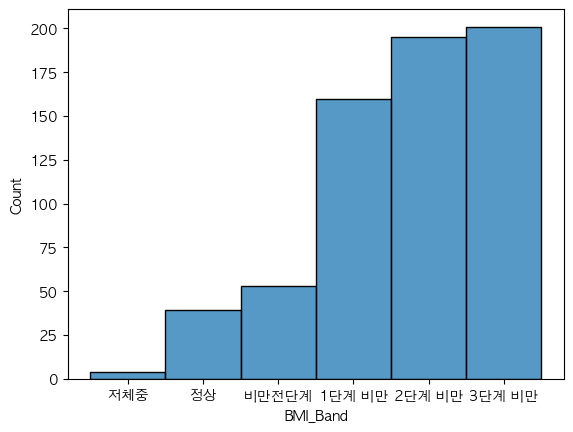

In [13]:

# 5️⃣ 단변량 시각화
# ------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

sns.histplot(df, x='BMI_Band')
plt.show()

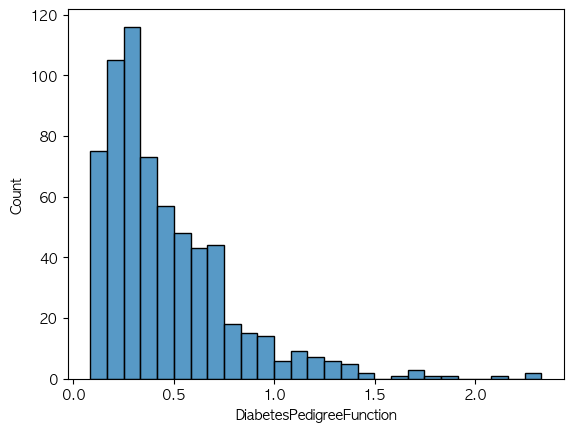

In [16]:
sns.histplot(df, x='DiabetesPedigreeFunction')
plt.show()


## 🔗 이변량 시각화 (Bivariate)
- **두 변수 간 관계**를 시각화합니다.  
- 예시: `Glucose vs Outcome` 박스플롯, `Age vs BMI` 산점도 등


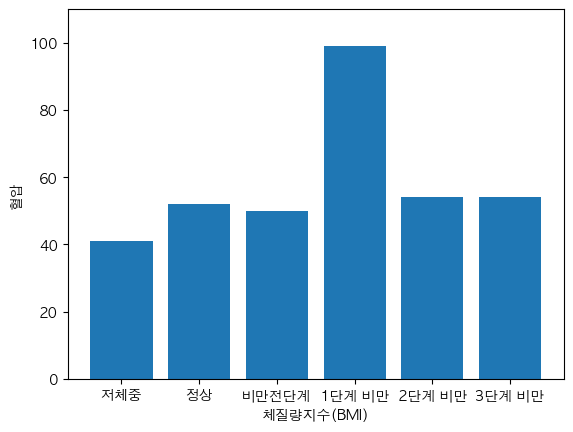

In [34]:

# 6️⃣ 이변량 시각화
# ------------------------------------------------

plt.bar(df['BMI_Band'].sort_values(), df['SkinThickness'])
plt.xlabel('체질량지수(BMI)')
plt.ylabel('혈압')
plt.ylim(0, 110)
plt.show()

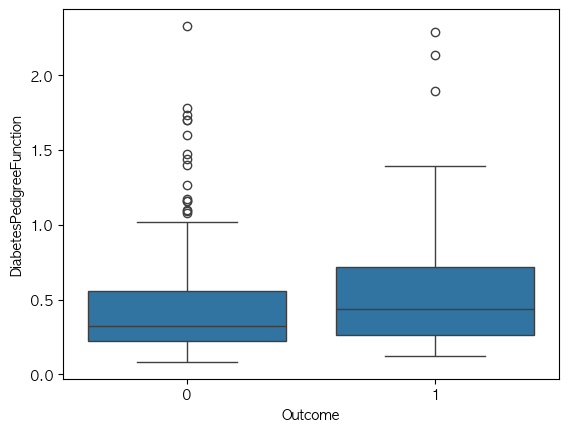

In [37]:
sns.boxplot(df, x='Outcome', y='DiabetesPedigreeFunction')
plt.show()


## 🔥 상관관계 Heatmap
- 수치형 변수 간 상관관계를 계산하고 시각화합니다.  
- `Outcome`과의 관련성이 큰 변수를 찾아보세요.


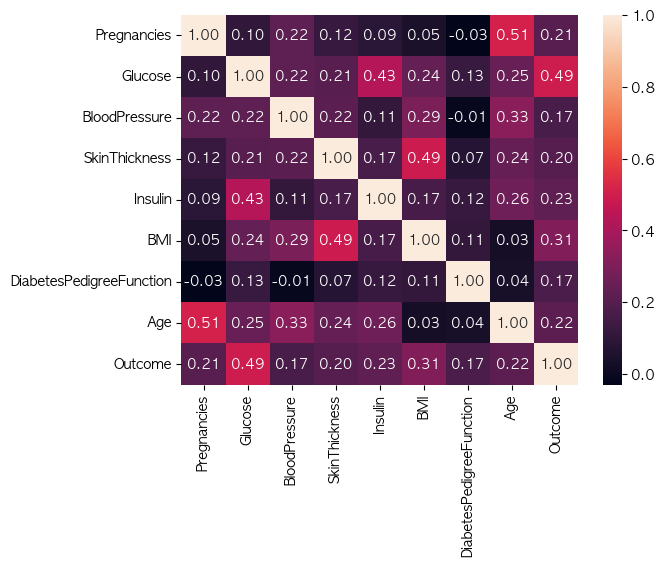

In [19]:

# 7️⃣ 상관관계 Heatmap
# ------------------------------------------------
corr = df.select_dtypes('number').corr()

sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()


## 🧾 인사이트/결론 정리
- 가설이 맞았는가?  
- 어떤 변수들이 Outcome과 강한 관련이 있는가?  
- 추가로 확인해보고 싶은 점은?


In [38]:

# 8️⃣ 인사이트 정리 (자유 서술)
# ------------------------------------------------

insight = """
✅ 가설 1: BMI가 높은 사람은 피부 두께도 두꺼울것이다.
- 근거: BMI가 높은 비만1단계 그룹이 가장 피부 두께가 두껍고, 비만2단계와 3단계 그룹도 비만전단계 그룹보다 더 피부 두께가 두꺼운것으로 확인됨

✅ 가설 2: 당뇨 가족력이 있는 사람이 당뇨 발병률이 높을것이다.
- 근거: 당뇨 가족력이 있는 사람이 가족력 없는 사람보다 발병률은 높으나, 큰 차이는 없는것으로 확인됨

Outcome과 Glucose, BMI가 관련이 강한것으로 나타남.
추가로 확인해보고 싶은 점은 BMI가 높을수록, 혈압도 높게 나타나는지 또는 인슐린이 높은 환자일수록 혈당은 낮은지 등을 확인하고 싶다.

📌 다음에 해볼 일(옵션):
- 이상치 처리/스케일링/모델 학습과의 연결
- 새로운 파생변수(예: BMI Band, Age Band) 시도
"""
